# Building a regression model using MultiLinearRegression

The goal is to be able to predict the future prices of houses using housing price data from the King County region.
This predictive model is built using the MultiLinear Regression algorithm.

In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
# load dataset

dataset = pd.read_csv('./data/kc_house_data.csv')

# basic info on data types and null count for each feature. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  condition      21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [38]:
# Features present
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition'],
      dtype='object')

In [4]:
# Performing a null check

dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition        0
dtype: int64

In [5]:
# Basic statistics of features

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
sqft_basement,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03
yr_built,21613.0,1971.005136,29.373411,1900.0000,1951.000,1975.0000,1997.000,2.015000e+03


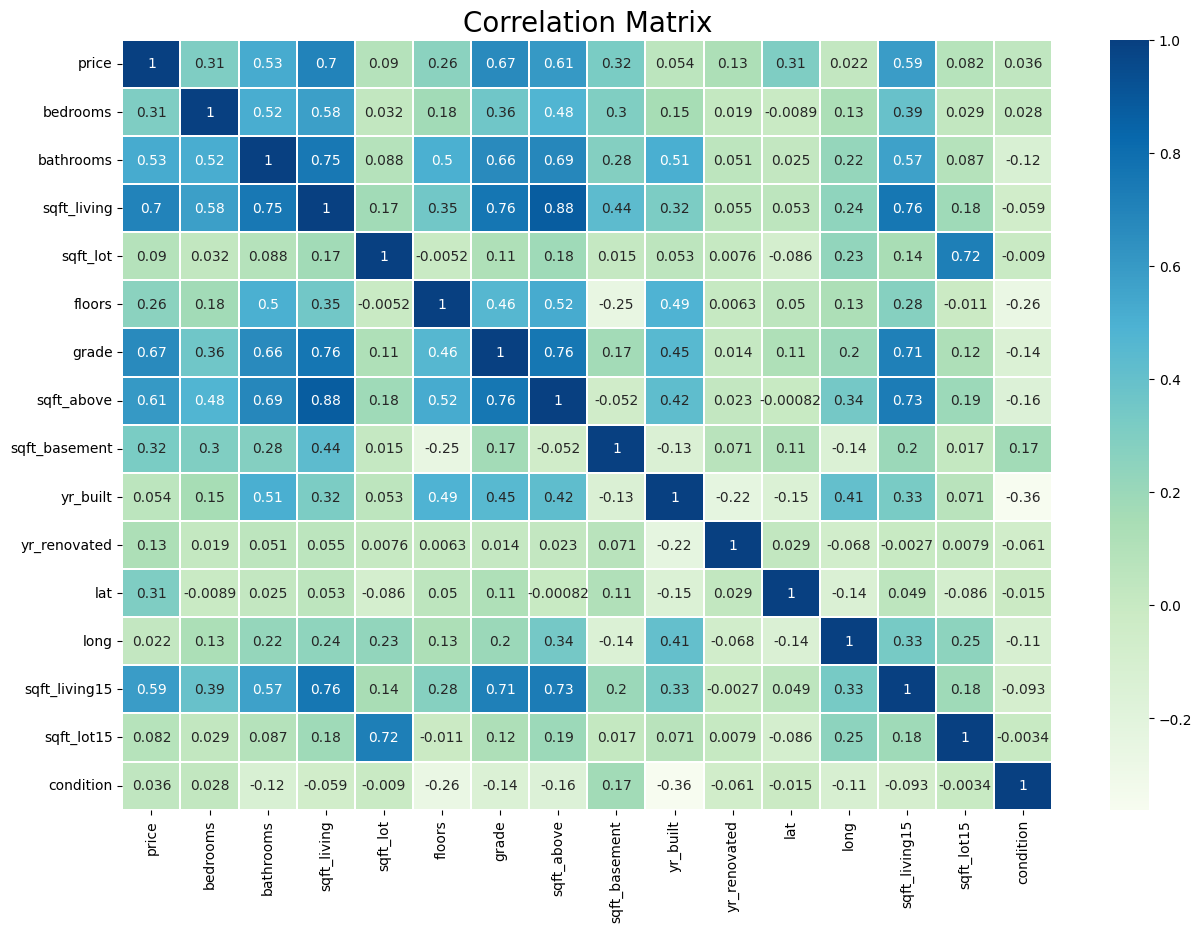

In [6]:
# Investigating the correlation strength between features

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(dataset.corr(), annot=True, linewidths=0.25, cmap="GnBu")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [7]:
# Which features are more correlated to the target(price)?

dataset.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
Name: price, dtype: float64

*Deductions:*

- The features: sqft_living, grade, sqft_above, sqft_living15 and bathrooms are highly correlated to the price 
and may influence prediction values more than other features.
- There seems to be high collinearity between several of the features. For eg highest correlation is 0.88 between sqft_above and sqft_living suggesting high collinearity between them worth investigating.

In [8]:
# Addressing multicolinearity..

# Variance Inflation Factor(VIF) measures how much a feature is linearly correlated with other features in the dataset
# A high VIF indicates that the feature is higly collinear with one or more other features.
# VIF=1: No multicollinearity.
# VIF∈[1,5]: Moderate multicollinearity; usually acceptable.
# VIF>5: High multicollinearity; potential issue.
# VIF≫10: Severe multicollinearity; the feature should be investigated.


vif_data = pd.DataFrame()
vif_data['feature'] = dataset.columns
vif_data['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
3,sqft_living,inf
7,sqft_above,inf
8,sqft_basement,inf
12,long,1.352298e+05
11,lat,1.275370e+05
9,yr_built,9.394864e+03
6,grade,1.569578e+02
15,condition,3.484715e+01
2,bathrooms,2.877185e+01
13,sqft_living15,2.629998e+01


*Deductions*

High  multicollinearity Features
- Bedrooms (VIF = 22.97): High multicollinearity.
- Bathrooms (VIF = 28.52): High multicollinearity.
- sqft_living (VIF = inf): Perfect collinearity, meaning it is linearly dependent on other features.
- sqft_above (VIF = inf): Same as sqft_living, indicating it is highly correlated with other features.
- sqft_basement (VIF = inf): Likely highly dependent on sqft_living and sqft_above.
- Grade (VIF = 140.47): Very high multicollinearity.
- yr_built (VIF = 8354.75): Extreme multicollinearity.
- Latitude (VIF = 118,398) and Longitude (VIF = 130,725): Severe collinearity likely due to geographic proximity or clustering.

In [9]:
# Investigating the possibility of dropping the sqft_above feature...

dataset['sqft_total'] = dataset['sqft_basement'] + dataset['sqft_above']
dataset[['sqft_total', 'sqft_living']]

,sqft_total,sqft_living
0,1180,1180
1,2570,2570
2,770,770
3,1960,1960
4,1680,1680
...,...,...
21608,1530,1530
21609,2310,2310
21610,1020,1020
21611,1600,1600


In [10]:
# dropping the sqft_basement and sqft_above given that their sum equates to the sqft_living which is already captured in the feature set.

dataset.drop(columns=['sqft_basement','sqft_above','sqft_total'], inplace=True)

In [11]:
vif_data = pd.DataFrame()
vif_data['feature'] = dataset.columns
vif_data['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
10,long,135229.184100
9,lat,127398.018529
7,yr_built,9263.675205
6,grade,155.695416
13,condition,34.740853
3,sqft_living,33.913013
2,bathrooms,27.901262
11,sqft_living15,25.489125
1,bedrooms,23.523402
5,floors,13.770480


## Initial model build

Root Mean Squared Error: 223487.659
Mean Squared Error: 49946733618.566
Mean Absolute Error: 131059.160
R² Score: 0.6585


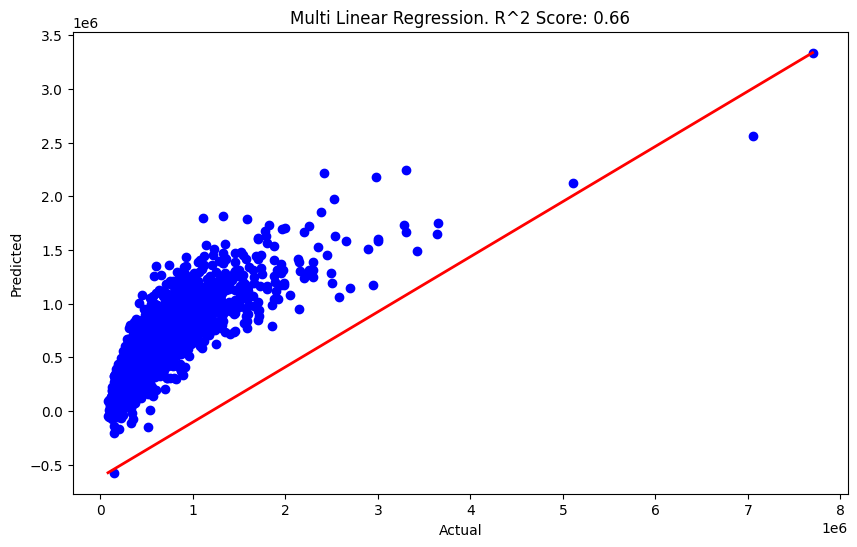

In [12]:
# Spliting dataset into features and target

X = dataset.iloc[:, 1:]  # Features
y = dataset.iloc[:, 0]   # Target

# Spliting into train and test set using 80/20 split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluating model performance

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Multi Linear Regression. R^2 Score: {r2:.2f}")
plt.show()

### Initial model results

- Prediction Errors:
    On average, the model’s predictions are off by $129,069 (MAE), which might be high depending on the price range.
    Large errors (possibly due to outliers or high variance) are reflected in the high MSE (45 billion dollars²).

- Model Fit:
    The model explains about 66.4% of the variance in house prices (R² Score), which is ok but can be improved as unexplained variance is about (~34.6%).

## Investigating potential outliers.

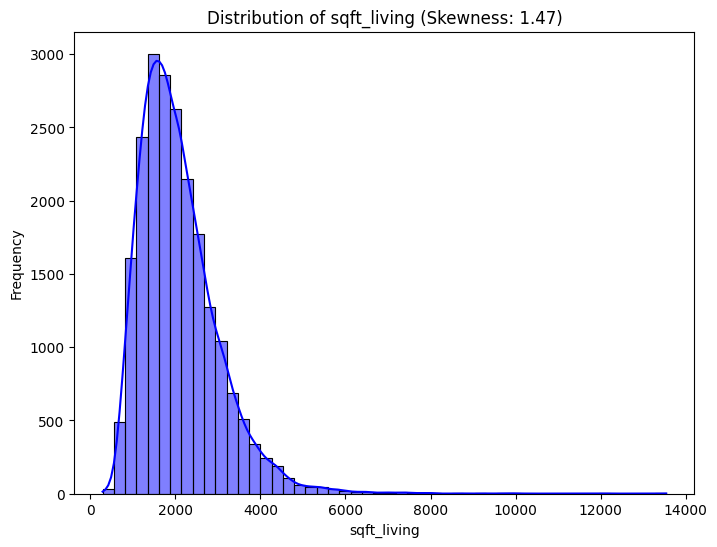

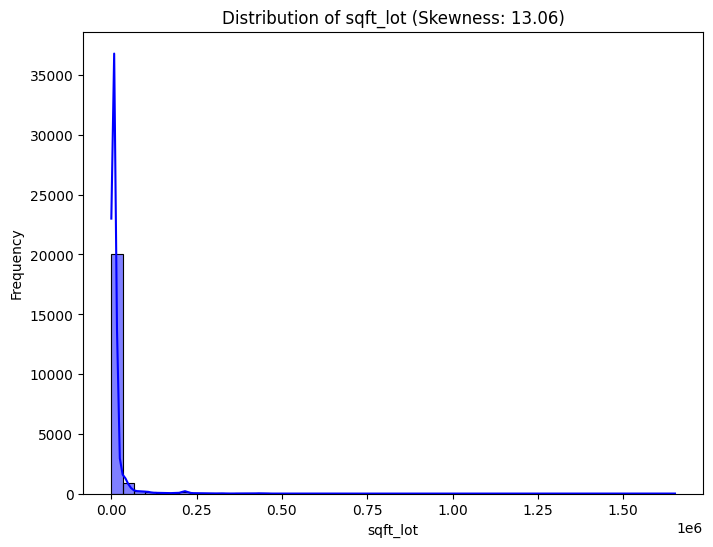

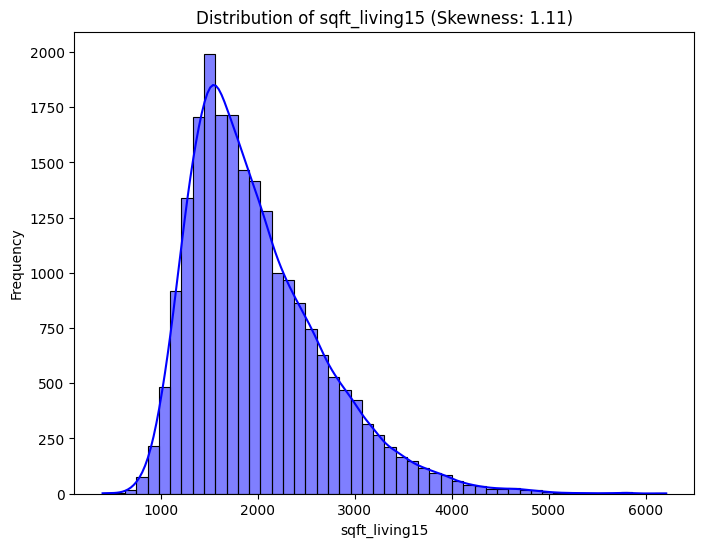

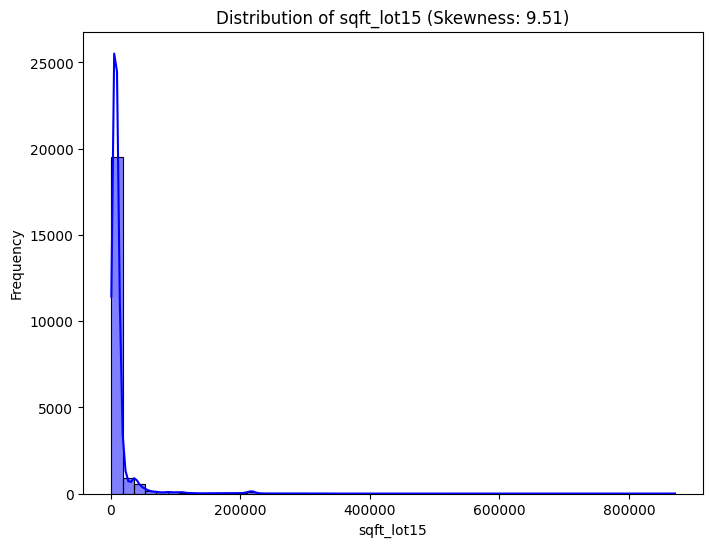

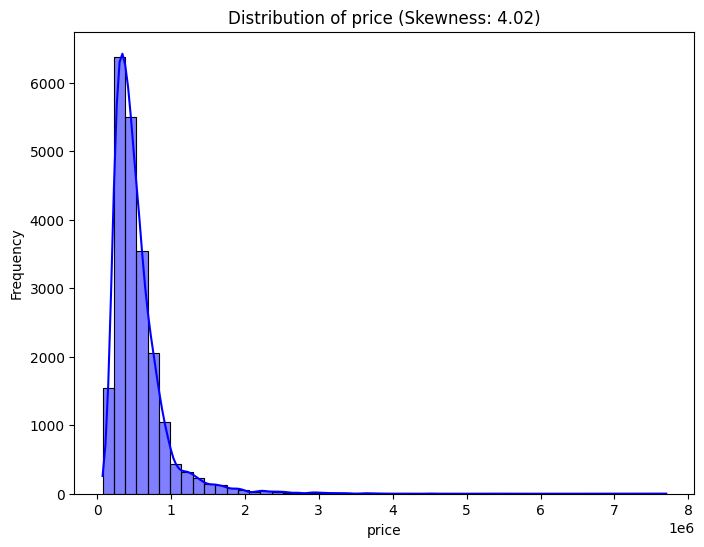

In [13]:
# Features to check for skewness in some owners..
features_to_check = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']

# Plot histogram + KDE for each feature
for feature in features_to_check:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[feature], kde=True, color='blue', bins=50)
    skew_value = dataset[feature].skew()
    plt.title(f"Distribution of {feature} (Skewness: {skew_value:.2f})")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

## Deductions
- All of these features although shows a normal distribution, seemed to be positively skewed with a long right tail.
- Therefore we'll proceed to apply some log transformations to these to reduce the effect these extremes may have on the model. 

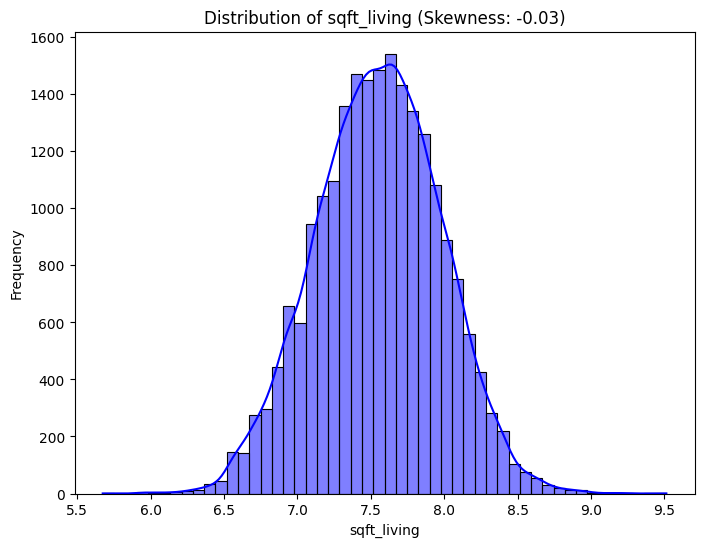

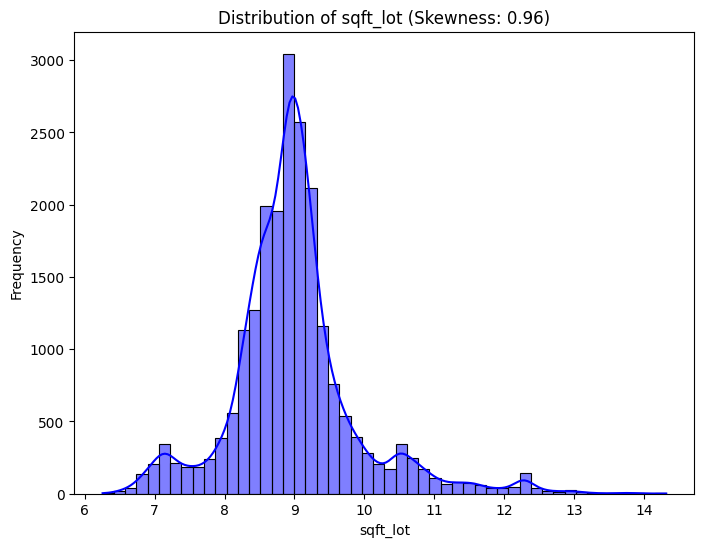

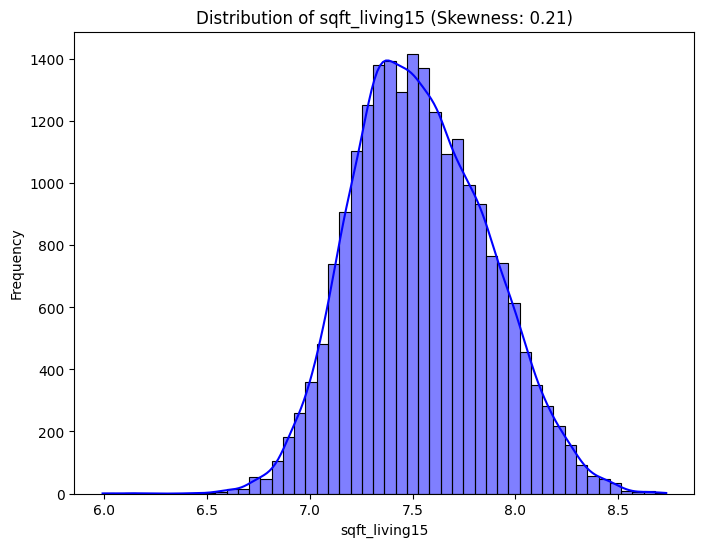

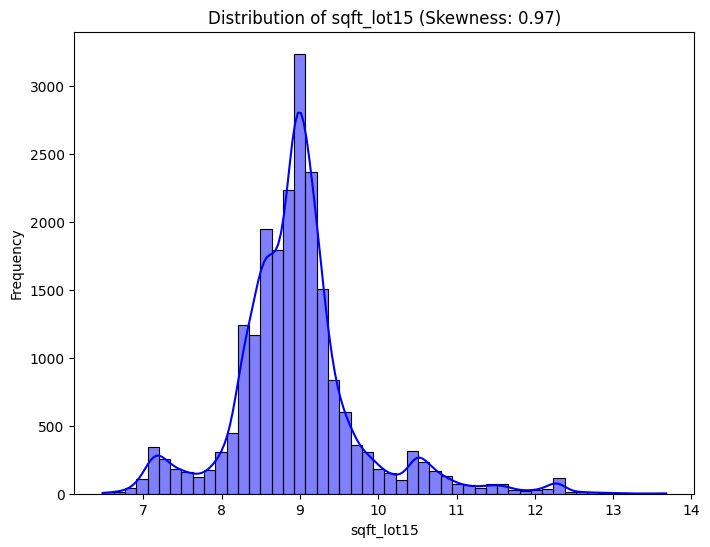

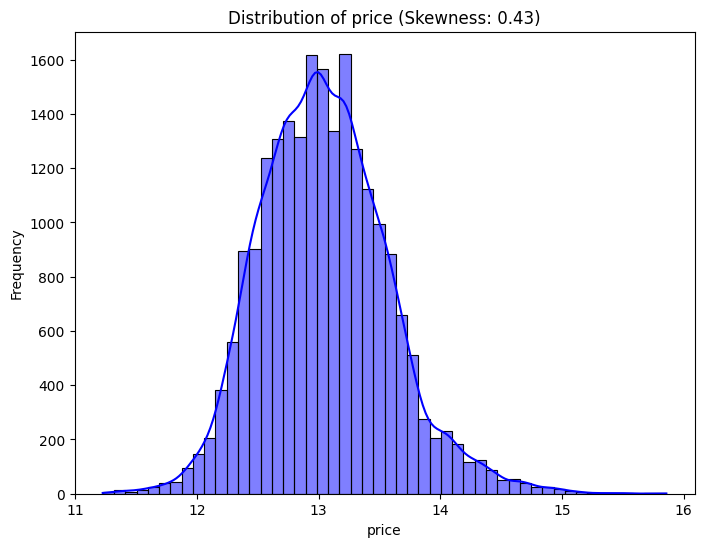

In [14]:
# Features to check for skewness in some owners..
features_to_check = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']

# Plot histogram + KDE for each feature
for feature in features_to_check:
    plt.figure(figsize=(8, 6))
    sns.histplot(np.log1p(dataset[feature]), kde=True, color='blue', bins=50)
    skew_value = np.log1p(dataset[feature]).skew()
    plt.title(f"Distribution of {feature} (Skewness: {skew_value:.2f})")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

## Applying log transformations to the dataset to address skewness

Root Mean Squared Error: 203985.049
Mean Squared Error: 41609900231.153
Mean Absolute Error: 112846.900
R² Score: 0.7155


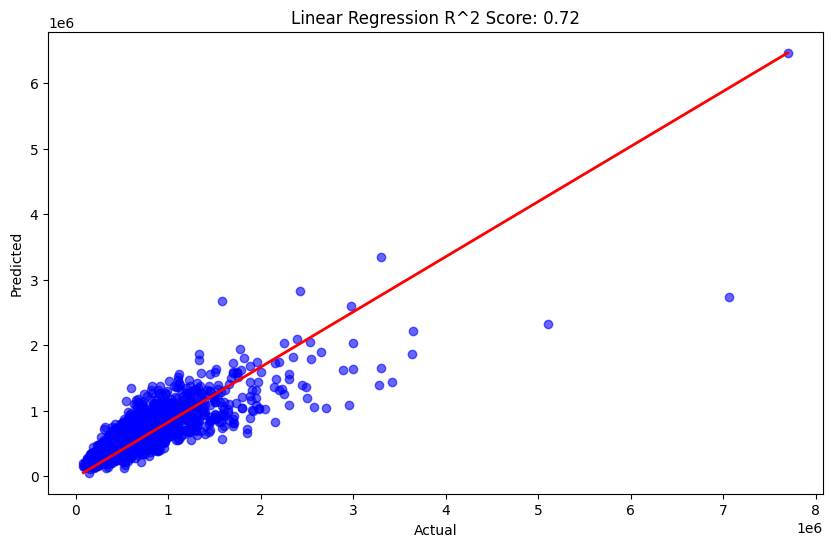

In [15]:
X = dataset.iloc[:, 1:]  # Features
y = dataset.iloc[:, 0]   # Target

# applying a log transform on target
y_log = np.log1p(y) 

# applying log transform on selected features
skewed_features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
X[skewed_features] = X[skewed_features].apply(np.log1p)

# Spliting into train and test set using 80/20 split.
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a model
lin_regressor = LinearRegression()
lin_regressor.fit(X_train_scaled, y_train_log)

# Train model with transformed target
y_pred_log = lin_regressor.predict(X_test_scaled)

# Reverse the log transformation for evaluation
y_pred = np.expm1(y_pred_log)
y_test =np.expm1(y_test_log)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Linear Regression R^2 Score: {r2:.2f}")
plt.show()

In [16]:
# Checking how well the model will generalize on new dataset using cross validation?

cv_scores = cross_val_score(lin_regressor, X_train_scaled, y_train_log, cv=10, scoring='r2')

print(f"Cross-Validated R² Scores: CV=10\n")
for i, score in enumerate(cv_scores):
    print(f"K-fold = {i+1} R² Scores: {score}")

print('\n')
print(f"Mean Cross-Validated R² Score: {cv_scores.mean():.4f}")

Cross-Validated R² Scores: CV=10

CV= 1 R² Scores: 0.7572536130106327
CV= 2 R² Scores: 0.7581580657421217
CV= 3 R² Scores: 0.7499869531171126
CV= 4 R² Scores: 0.7512576517068508
CV= 5 R² Scores: 0.7515821272481255
CV= 6 R² Scores: 0.7562856490912652
CV= 7 R² Scores: 0.7577488065051701
CV= 8 R² Scores: 0.7515489146128062
CV= 9 R² Scores: 0.7530473048357884
CV= 10 R² Scores: 0.75248559477523


Mean Cross-Validated R² Score: 0.7539


# Varying the random states for the test_train split for accuracy comparison

In [36]:
random_states = range(0,11) # [1, 10, 25, 30, 42, 50, 60, 65,80,100]
rmse_scores = []
mae_scores = []
mse_scores = []
r2_scores = []

for random_state in random_states:
    X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating a model
    lin_regressor = LinearRegression()
    lin_regressor.fit(X_train_scaled, y_train_log)

    # Train model with transformed target
    y_pred_log = lin_regressor.predict(X_test_scaled)

    # Reverse the log transformation for evaluation
    y_pred = np.expm1(y_pred_log)
    y_test =np.expm1(y_test_log)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(root_mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))


results = pd.DataFrame({
    "random_states": random_states,
    "mae_score": mae_scores,
    "mse_score": mse_scores,
    "rmse_score": rmse_scores,
    "r2_score": r2_scores,
})

results

,random_states,mae_score,mse_score,rmse_score,r2_score
0,0,108701.960242,3.465313e+10,186153.506900,0.709005
1,1,115985.137860,4.946132e+10,222399.007356,0.713760
2,2,113823.958519,4.076800e+10,201910.865637,0.708334
3,3,112075.830792,3.917033e+10,197914.952121,0.695196
4,4,115431.536110,4.117908e+10,202926.285478,0.682023
5,5,115806.625032,4.246681e+10,206074.773812,0.689181
6,6,114906.904690,4.167684e+10,204149.073156,0.689347
7,7,117376.268161,4.229066e+10,205646.930019,0.680478
8,8,113208.544724,4.013030e+10,200325.480122,0.718875
9,9,115994.899731,4.342533e+10,208387.450031,0.690231


In [37]:
print("Average scores: ")
print(f"Average mean_squared_error: {np.mean(mse_scores):.4f}")
print(f"Average mean_absolute_error: {np.mean(mae_scores):.4f}")
print(f"Average root_mean_squared_error: {np.mean(rmse_scores):.4f}")
print(f"Average r2_score: {np.mean(r2_scores)}")

Average scores: 
Average mean_squared_error: 41530153974.8134
Average mean_absolute_error: 114196.2333
Average root_mean_squared_error: 203624.8522
Average r2_score: 0.6992687074711771


In [27]:
# Which features do influence the model prediction more?

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,sqft_living,156416.627092
5,grade,125283.785874
8,lat,70903.522943
10,sqft_living15,36156.138039
1,bathrooms,30908.334324
12,condition,21957.364816
7,yr_renovated,13004.070808
3,sqft_lot,4813.071031
4,floors,2979.054105
11,sqft_lot15,-8378.027235


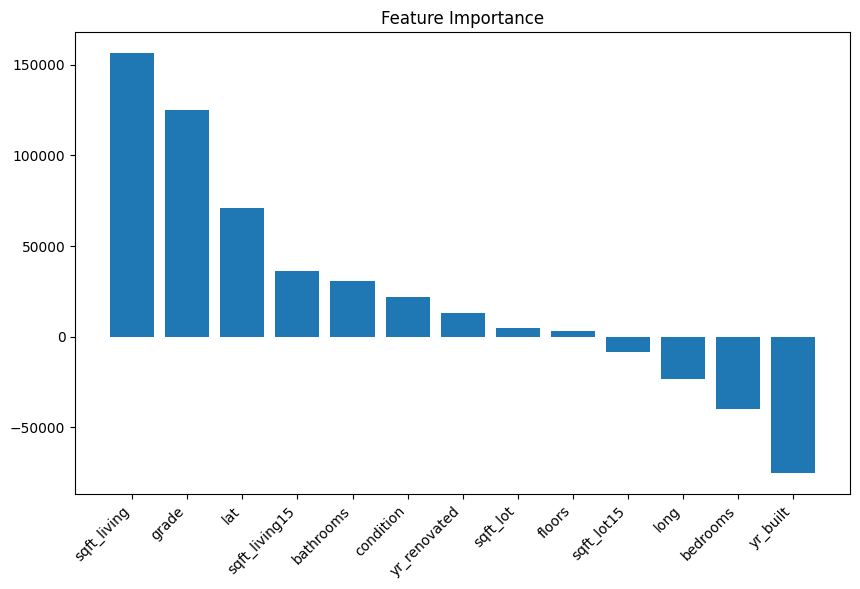

In [28]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance")
plt.show()

## Another approach to optimizing

Introducing polynomial terms into the feature set to reduce the high multi-collinearity.


Mean Squared Error: 31367993306.224
Mean Absolute Error: 106569.003
R² Score: 0.7704


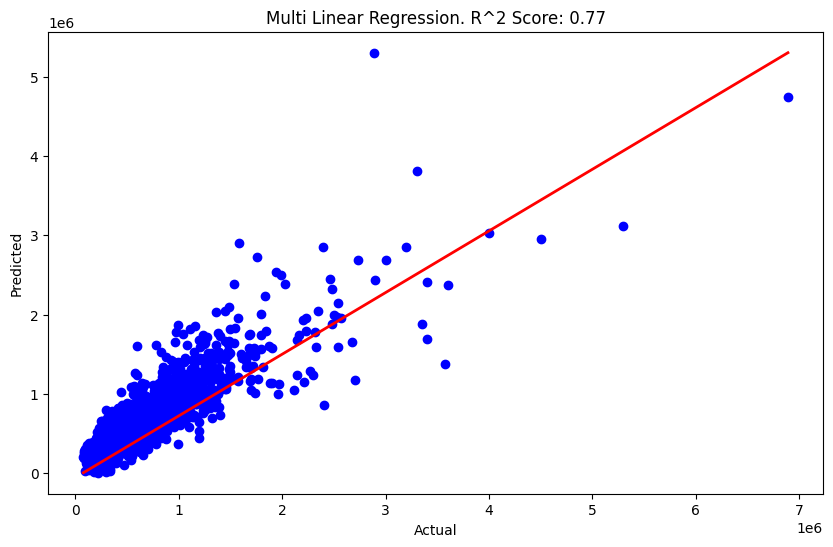

In [35]:

# Spliting dataset into features and target

X = dataset.iloc[:, 1:]  # Features
y = dataset.iloc[:, 0]   # Target

# Spliting into train and test set using 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Creating a model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluating model performance

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Multi Linear Regression. R^2 Score: {r2:.2f}")
plt.show()